# Exploratory analysis of Eurovision votes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Saving dataframes and maps as images and html functions

In [2]:
from pandas.plotting import table

def save_dataframe(df, path="df/df.png"):
    fig, ax = plt.subplots(figsize=(15, 15)) # set size frame
    ax.xaxis.set_visible(False)  # hide the x axis
    ax.yaxis.set_visible(False)  # hide the y axis
    ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
    tabla = table(ax, df, loc='upper right', colWidths=[0.17]*len(df.columns))  # where df is your data frame
    tabla.auto_set_font_size(False) # Activate set fontsize manually
    tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
    tabla.scale(1.6, 1.6) # change size table
    plt.savefig(path, transparent=True)
    
def save_map_png(fig, path="maps/map.png"):
    fig.write_image(path, width=1920, height=1080, scale=2)
    
def save_fig_png(fig, path="images/fig.png"):
    fig.write_image(path)

def save_fig_html(fig, path="html/fig.html"):
    fig.write_html(path)

# Loading data

<a href="https://www.kaggle.com/datagraver/eurovision-song-contest-scores-19752019">Eurovision Song Contest scores 1975-2019 Dataset</a>

In [3]:
df = pd.read_excel('eurovision_song_contest_voting_dataset.xlsx')

In [4]:
df_codes = pd.read_csv('countries.csv', index_col='Country', encoding='cp1252')
codes_dict = df_codes.cc3.to_dict()
codes_dict = {x: v.replace(' ', '') for x, v in codes_dict.items()}

# EDA & Preprocessing

In [5]:
df.shape

(49832, 8)

In [6]:
df.head()

Year (semi-) final Edition Jury or Televoting From country To country  \
0  1975             f   1975f                  J      Belgium    Belgium   
1  1975             f   1975f                  J      Belgium    Finland   
2  1975             f   1975f                  J      Belgium     France   
3  1975             f   1975f                  J      Belgium    Germany   
4  1975             f   1975f                  J      Belgium    Ireland   

   Points       Duplicate  
0             0         x  
1             0       NaN  
2             2       NaN  
3             0       NaN  
4            12       NaN

In [7]:
df.tail()

Year (semi-) final Edition Jury or Televoting From country  \
49827  2019             f   2019f                  J      Belarus   
49828  2019             f   2019f                  J      Belarus   
49829  2019             f   2019f                  J      Belarus   
49830  2019             f   2019f                  J      Belarus   
49831  2019             f   2019f                  J      Belarus   

            To country  Points       Duplicate  
49827           Greece             3       NaN  
49828          Germany             0       NaN  
49829          Belarus             0         x  
49830  The Netherlands             6       NaN  
49831           Russia             1       NaN

In [8]:
df.describe()

Year  Points      
count  49832.000000  49832.000000
mean    2006.592972      2.626947
std       11.475325      3.659278
min     1975.000000      0.000000
25%     2001.000000      0.000000
50%     2009.000000      0.000000
75%     2016.000000      5.000000
max     2019.000000     12.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49832 entries, 0 to 49831
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                49832 non-null  int64 
 1   (semi-) final       49832 non-null  object
 2   Edition             49832 non-null  object
 3   Jury or Televoting  49832 non-null  object
 4   From country        49832 non-null  object
 5   To country          49832 non-null  object
 6   Points              49832 non-null  int64 
 7   Duplicate           1529 non-null   object
dtypes: int64(2), object(6)
memory usage: 3.0+ MB


In [10]:
df['Year'].unique()

array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019], dtype=int64)

In [11]:
df['Jury or Televoting'].unique()

array(['J', 'T'], dtype=object)

In [12]:
df['(semi-) final'].unique()

array(['f', 'sf', 'sf1', 'sf2'], dtype=object)

In [13]:
df.Edition.unique()

array(['1975f', '1976f', '1977f', '1978f', '1979f', '1980f', '1981f',
       '1982f', '1983f', '1984f', '1985f', '1986f', '1987f', '1988f',
       '1989f', '1990f', '1991f', '1992f', '1993f', '1994f', '1995f',
       '1996f', '1997f', '1998f', '1999f', '2000f', '2001f', '2002f',
       '2003f', '2004f', '2004sf', '2005f', '2005sf', '2006f', '2006sf',
       '2007f', '2007sf', '2008f', '2008sf1', '2008sf2', '2009f',
       '2009sf1', '2009sf2', '2010f', '2010sf1', '2010sf2', '2011f',
       '2011sf1', '2011sf2', '2012f', '2012sf1', '2012sf2', '2013f',
       '2013sf1', '2013sf2', '2014f', '2014sf1', '2014sf2', '2015f',
       '2015sf1', '2015sf2', '2016f', '2016sf1', '2016sf2', '2017f',
       '2017sf1', '2017sf2', '2018f', '2018sf1', '2018sf2', '2019sf1',
       '2019sf2', '2019f'], dtype=object)

Our dataset contains Eurovision song contests from 1975 to 2019. In the first years, until 2003, the contest had only a final. In 2004 the semi-final was introduced and starting from 2008 there were 2 semi-finals. Every country in the contest gives points to other countries: 0, 1, 2, 3, 4, 5, 6, 7, 8, 10 and 12.

## Fixing bad naming in the datasets

In [14]:
df.rename(columns={'Points      ': "Points"}, inplace=True)

In [15]:
df.replace('The Netherands', 'The Netherlands', inplace=True)

In [16]:
df.replace(['F.Y.R. Macedonia', 'Macedonia'], 'North Macedonia', inplace=True)

In [17]:
codes_dict['The Netherlands'] = codes_dict.pop('Netherlands')
codes_dict['North Macedonia'] = codes_dict.pop('Macedonia')
codes_dict['Bosnia & Herzegovina'] = codes_dict.pop('Bosnia and Herzegovina')

## Grouping by year and country

In [18]:
from_countries = df['From country'].unique()
from_countries

array(['Belgium', 'Finland', 'France', 'Germany', 'Ireland', 'Israel',
       'Italy', 'Luxembourg', 'Malta', 'Monaco', 'Norway', 'Portugal',
       'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'Turkey',
       'United Kingdom', 'Yugoslavia', 'Austria', 'Greece', 'Denmark',
       'Morocco', 'Cyprus', 'Iceland', 'Bosnia & Herzegovina', 'Croatia',
       'Slovenia', 'Estonia', 'Hungary', 'Lithuania', 'Poland', 'Romania',
       'Russia', 'Slovakia', 'North Macedonia', 'Latvia', 'Ukraine',
       'Albania', 'Andorra', 'Belarus', 'Serbia & Montenegro', 'Bulgaria',
       'Moldova', 'Armenia', 'Czech Republic', 'Georgia', 'Montenegro',
       'Serbia', 'Azerbaijan', 'San Marino', 'Australia'], dtype=object)

In [19]:
to_countries = df['To country'].unique()
to_countries

array(['Belgium', 'Finland', 'France', 'Germany', 'Ireland', 'Israel',
       'Italy', 'Luxembourg', 'Malta', 'Monaco', 'Norway', 'Portugal',
       'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'Turkey',
       'United Kingdom', 'Yugoslavia', 'Austria', 'Greece', 'Denmark',
       'Morocco', 'Cyprus', 'Iceland', 'Bosnia & Herzegovina', 'Croatia',
       'Slovenia', 'Estonia', 'Hungary', 'Lithuania', 'Poland', 'Romania',
       'Russia', 'Slovakia', 'North Macedonia', 'Latvia', 'Ukraine',
       'Albania', 'Serbia & Montenegro', 'Andorra', 'Belarus', 'Moldova',
       'Bulgaria', 'Armenia', 'Georgia', 'Serbia', 'Czech Republic',
       'Montenegro', 'Azerbaijan', 'San Marino', 'Australia'],
      dtype=object)

In [20]:
np.setxor1d(from_countries, to_countries)

array([], dtype=object)

In [21]:
df.groupby(['Year', 'To country']).sum()

Points
Year To country             
1975 Belgium              17
     Finland              74
     France               91
     Germany              15
     Ireland              68
...                      ...
2019 Spain                54
     Sweden              572
     Switzerland         596
     The Netherlands     778
     United Kingdom       11

[1274 rows x 1 columns]

## Duplicates and null values

In [22]:
df.duplicated().sum()

0

In [23]:
df = df[df['Duplicate'] != 'x']
df.drop('Duplicate', axis=1, inplace=True)

In [24]:
df.isnull().sum()

Year                  0
(semi-) final         0
Edition               0
Jury or Televoting    0
From country          0
To country            0
Points                0
dtype: int64

## 0 points (zero) and 12 points (douze)

In [25]:
df_douze = df[df['Points'] == 12][['Jury or Televoting', 'From country', 'To country', 'Points']]
df_zero = df[df['Points'] == 0][['Jury or Televoting', 'From country', 'To country', 'Points']]

In [26]:
# Who gets the most 12 points
df_douze['To country'].value_counts()

Sweden                  157
Russia                  109
Greece                   89
Denmark                  81
Norway                   81
Ukraine                  74
Ireland                  73
Portugal                 67
Serbia                   64
United Kingdom           64
The Netherlands          64
Cyprus                   63
Italy                    61
Turkey                   60
Israel                   57
Germany                  57
Azerbaijan               57
Armenia                  57
Belgium                  51
France                   49
Bosnia & Herzegovina     49
Romania                  49
Austria                  48
Estonia                  42
Moldova                  41
Switzerland              39
Australia                38
Bulgaria                 38
Iceland                  37
Albania                  35
Spain                    35
North Macedonia          33
Malta                    33
Lithuania                32
Finland                  30
Hungary             

Sweden, Russia and Greece get the most 12 points from other contestants.

In [27]:
# Who gets the most 0 points
df_zero['To country'].value_counts()

Spain                   940
Germany                 840
Finland                 824
United Kingdom          790
Cyprus                  775
France                  766
Portugal                754
Norway                  751
Denmark                 742
Austria                 727
Greece                  719
Iceland                 680
The Netherlands         680
Belgium                 680
Israel                  679
Slovenia                625
Lithuania               613
Ireland                 608
Croatia                 584
Switzerland             583
Sweden                  578
Turkey                  573
Malta                   571
Estonia                 562
Albania                 532
North Macedonia         528
Poland                  519
Hungary                 515
Belarus                 505
Romania                 484
Latvia                  443
Bosnia & Herzegovina    441
Moldova                 430
Serbia                  422
Armenia                 394
Ukraine             

Spain, Germany and Finland get the most 0 points from other contestants.

In [28]:
df_douze.groupby(['To country', 'From country']).size().sort_values(ascending=False).reset_index(name='counts')

To country    From country  counts
0       Greece          Cyprus      34
1       Cyprus          Greece      30
2      Romania         Moldova      20
3       Sweden         Denmark      18
4      Moldova         Romania      16
..         ...             ...     ...
889   Portugal         Moldova       1
890    Germany  United Kingdom       1
891    Germany      Yugoslavia       1
892     Greece      Azerbaijan       1
893    Albania         Austria       1

[894 rows x 3 columns]

We can see the political relationships between countries by giving 12 points to each other:
- Cyprus -> Greece, 34 times!
- Greece -> Cyprus, 30 times!
- Moldova	-> Romania, 20 times!
- Denmark -> Sweden, 18 times!
- Romania -> Moldova, 16 times!

### Which countries gives the most 12 points to...

In [29]:
country = 'Israel'

In [30]:
df_temp = df_douze.groupby(['To country', 'From country']).size().sort_values(ascending=False).reset_index(name='counts').groupby('To country').head(20)
df_temp[df_temp['To country'] == country].sort_values(by='counts', ascending=False)

To country     From country  counts
76      Israel           France       6
132     Israel          Finland       4
138     Israel          Germany       4
225     Israel  The Netherlands       3
229     Israel            Spain       3
256     Israel   United Kingdom       3
259     Israel   Czech Republic       3
274     Israel          Austria       3
305     Israel           Turkey       2
304     Israel       Yugoslavia       2
303     Israel           Monaco       2
300     Israel       San Marino       2
295     Israel         Portugal       2
669     Israel          Andorra       1
670     Israel          Armenia       1
671     Israel        Australia       1
672     Israel       Azerbaijan       1
673     Israel          Belarus       1
674     Israel          Belgium       1
675     Israel          Croatia       1

### Every country with the country that gives the most 12 points

In [31]:
df_douze_points_countries_relationships = df_douze.groupby(['To country', 'From country']).size().sort_values(ascending=False).reset_index(name='counts')
df_douze_points_countries_relationships.drop_duplicates(subset=['To country'], keep='first', inplace=True)
df_douze_points_countries_relationships

To country     From country  counts
0                  Greece           Cyprus      34
1                  Cyprus           Greece      30
2                 Romania          Moldova      20
3                  Sweden          Denmark      18
4                 Moldova          Romania      16
5                 Albania  North Macedonia      16
6                  Russia          Belarus      15
8                  Serbia       Montenegro      13
11              Lithuania          Ireland      11
12                Armenia           Russia      11
15                 Norway          Denmark      10
17                 Latvia        Lithuania      10
18                Denmark          Iceland      10
22                Ukraine           Poland       9
24                  Italy            Spain       9
25                Ireland   United Kingdom       8
27        North Macedonia          Albania       8
29                Estonia          Finland       8
32                  Spain         Portugal       8
33               Portugal           France       8
34                 Turkey           France       8
35                Hungary           Serbia       8
37        The Netherlands          Belgium       8
40                Germany            Spain       8
42                Belarus          Ukraine       8
43                Croatia         Slovenia       8
44             Azerbaijan           Turkey       7
57         United Kingdom          Belgium       7
63                Georgia        Lithuania       6
67                Belgium           France       6
74   Bosnia & Herzegovina           Turkey       6
76                 Israel           France       6
87                Iceland          Finland       5
98                Finland          Iceland       5
113            Yugoslavia           Turkey       4
114                France          Austria       4
128             Australia           Sweden       4
143                Poland          Germany       4
144               Austria            Italy       4
154              Bulgaria          Belarus       4
172                 Malta         Slovakia       3
198               Andorra            Spain       3
227           Switzerland          Belgium       3
258   Serbia & Montenegro          Croatia       3
277            Montenegro           Serbia       3
287            Luxembourg           France       2
370        Czech Republic          Georgia       2
450              Slovenia          Croatia       2
483              Slovakia          Ukraine       1
753                Monaco           Sweden       1
814            San Marino            Malta       1

### Every country with the country that gives the most 0 points

In [101]:
df_zero.groupby(['To country', 'From country']).size().sort_values(ascending=False).reset_index(name='counts')

To country         From country  counts
0                   Spain               Sweden      39
1                  Norway               France      36
2                   Spain              Ireland      36
3                 Finland              Belgium      35
4                   Spain              Germany      35
...                   ...                  ...     ...
2344              Armenia               France       1
2345                Italy             Slovakia       1
2346  Serbia & Montenegro              Finland       1
2347  Serbia & Montenegro               France       1
2348              Romania  Serbia & Montenegro       1

[2349 rows x 3 columns]

In [32]:
df_zero_points_countries_relationships = df_zero.groupby(['To country', 'From country']).size().sort_values(ascending=False).reset_index(name='counts')
df_zero_points_countries_relationships.drop_duplicates(subset=['To country'], keep='first', inplace=True)
df_zero_points_countries_relationships

To country     From country  counts
0                    Spain           Sweden      39
1                   Norway           France      36
3                  Finland          Belgium      35
7                   Turkey         Portugal      33
8                  Germany           Israel      32
10                  Cyprus          Austria      32
16                Portugal   United Kingdom      31
22                  Sweden           Greece      30
25                  Greece          Finland      30
27                 Austria           Norway      30
33                  France          Germany      29
39          United Kingdom           Greece      28
40                 Denmark           Greece      28
47                 Belgium           Greece      27
49                Slovenia   United Kingdom      27
59                  Israel          Ireland      27
63                 Iceland           Cyprus      26
74         The Netherlands           Cyprus      25
97              Azerbaijan          Armenia      24
109                Ireland           Greece      24
113                Croatia          Denmark      24
123                Estonia          Croatia      23
124                  Malta           France      23
131            Switzerland   United Kingdom      23
141                Armenia       Azerbaijan      23
162        North Macedonia          Belgium      22
164                Belarus          Belgium      22
171              Lithuania          Croatia      22
175   Bosnia & Herzegovina          Estonia      22
194                Albania        Lithuania      22
204                 Latvia          Albania      21
221                  Italy   United Kingdom      21
277                Moldova  The Netherlands      20
299                Romania      Switzerland      20
323                Ukraine           France      19
338                 Poland            Malta      19
379                Hungary           Greece      18
381                 Russia      Switzerland      18
459                 Serbia          Estonia      17
533                Georgia           Norway      16
699             Luxembourg      Switzerland      14
938               Bulgaria          Iceland      12
957             Montenegro          Iceland      12
998             San Marino           France      12
1109             Australia          Georgia      11
1203        Czech Republic   United Kingdom      10
1233            Yugoslavia         Portugal      10
1597                Monaco  The Netherlands       6
1604              Slovakia  The Netherlands       6
1651               Andorra          Belgium       6
2198   Serbia & Montenegro          Iceland       2
2226               Morocco         Portugal       1

# Average points per country

In [34]:
df_average_points_per_country = df.groupby('To country').agg({'Points': ['mean']}).sort_values(('Points', 'mean'), ascending = False)

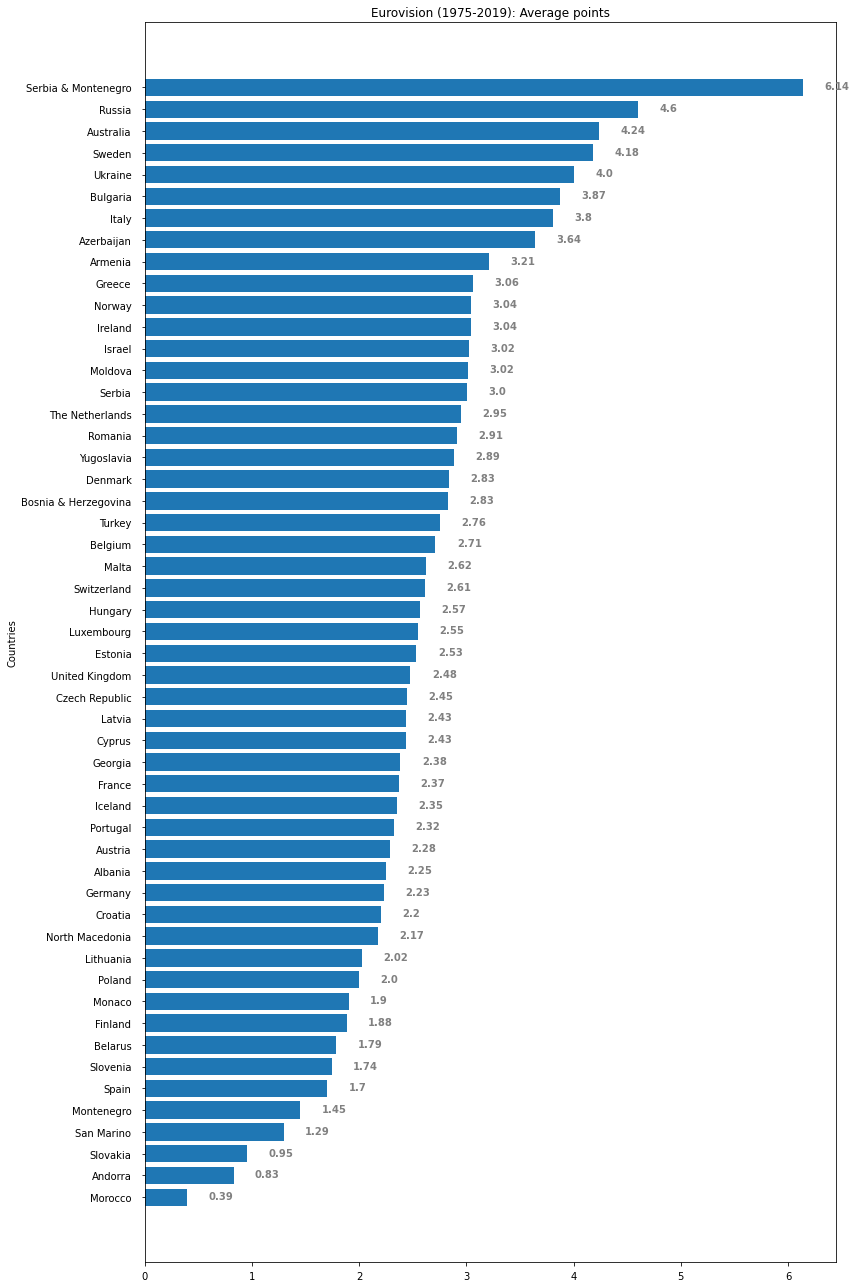

In [35]:
labels = df_average_points_per_country[('Points', 'mean')].index
avg_points = list(df_average_points_per_country[('Points', 'mean')])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(labels, avg_points)

ax.invert_yaxis()

ax.set_ylabel('Countries')
ax.set_title('Eurovision (1975-2019): Average points')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

fig.tight_layout()

plt.show()

# Average points per country by year

In [36]:
df_average_points_per_country_by_year = df.groupby(['To country', 'Year']).agg({'Points': ['mean']})

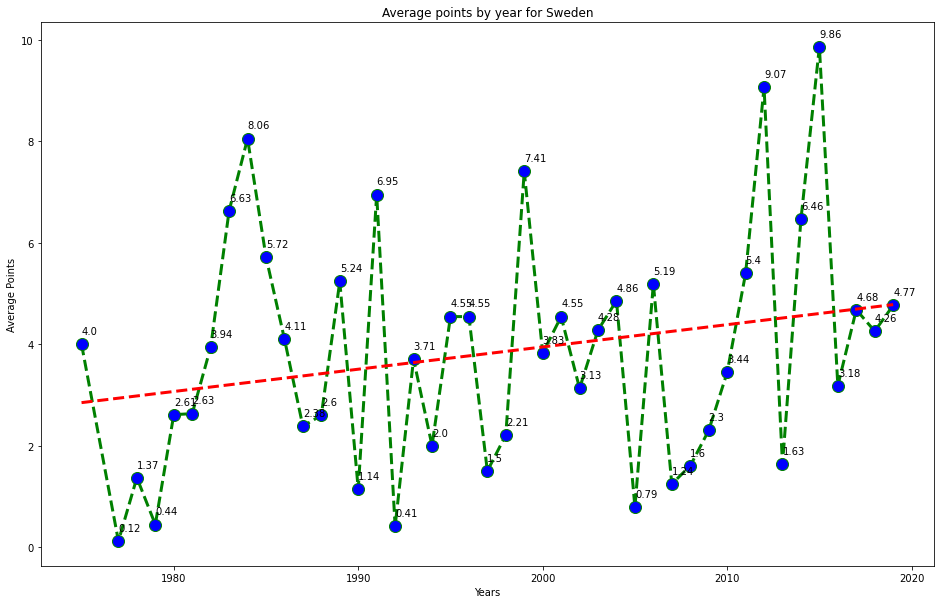

In [37]:
country = 'Sweden'
x = df_average_points_per_country_by_year.loc[[country]].index.get_level_values('Year')
y = df_average_points_per_country_by_year.loc[[country]][('Points', 'mean')]
z = np.poly1d(np.polyfit(x, y, 1))(x)

plt.figure(figsize=(16,10))
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.plot(x, z,"r--", linewidth = 3)
for year, average_points in zip(x, y): 
    plt.text(year, average_points+0.2, str(round(average_points, 2)))
plt.xlabel('Years')
plt.ylabel('Average Points')
plt.title('Average points by year for ' + country)
plt.show()

In [38]:
print('Maximum average points for', country, 'is', round(y.max(), 2), 'in', y.idxmax()[1])
print('Minimum average points for', country, 'is', round(y.min(), 2), 'in', y.idxmin()[1])
print('The gradient is',round((z[-1] - z[0]) / (max(x) - min(x)), 3))

Maximum average points for Sweden is 9.86 in 2015
Minimum average points for Sweden is 0.12 in 1977
The gradient is 0.044


# Ranking

**Side note:** The ranking is based on the points given for each country in every edition of every year (sf, sf1, sf2 and f). The rank can be a shared rank (averaged rank) with another 1 or more countries based on the shared points. For example, in the final of 1991 France and Sweden had the shared points of 146, so their ranking is 1.5 (1 and 2). Based on the rules for that time, Sweden was declared the winner.

In [39]:
df_rank = df.groupby(['Edition', 'To country']).agg({'Points': ['sum']})
df_rank.columns = ['Total Points']

In [40]:
df_rank['Rank'] = df_rank.groupby(level=0).rank(ascending=False)
df_rank = df_rank.sort_values(['Edition','Rank'], ascending=[True, True])

In [41]:
df_rank.loc[['2019f']][:5]

Total Points  Rank
Edition To country                         
2019f   The Netherlands           498   1.0
        Italy                     472   2.0
        Russia                    370   3.0
        Switzerland               364   4.0
        Sweden                    334   5.0

In [42]:
df_rank.loc[['2019f']][-5:]

Total Points  Rank
Edition To country                        
2019f   Spain                     54  22.0
        Israel                    35  23.0
        Belarus                   31  24.0
        Germany                   24  25.0
        United Kingdom            11  26.0

## Winners and Losers

In [43]:
# Let's remember that in 1991 France and Sweden got the same number of points, but Sweden won
df_rank.loc[('1991f', 'Sweden'), 'Rank'] = 1.0

In [44]:
n_winners_and_losers = 1
winners = df_rank.groupby(level=0).apply(lambda x: x.iloc[:n_winners_and_losers])
losers = df_rank.groupby(level=0).apply(lambda x: x.iloc[-n_winners_and_losers:])

df_winners_and_losers = pd.DataFrame({'Edition': winners.index.get_level_values(0)})
df_winners_and_losers.set_index('Edition', inplace=True)

df_winners_and_losers['Winning country'] = winners.index.get_level_values('To country')
df_winners_and_losers['Winning rank'] = list(winners['Rank'])
df_winners_and_losers['Winning points'] = list(winners['Total Points'])
df_winners_and_losers['Last place country'] = losers.index.get_level_values('To country')
df_winners_and_losers['Last place rank'] = list(losers['Rank'])
df_winners_and_losers['Last place points'] = list(losers['Total Points'])
df_winners_and_losers

Winning country  Winning rank  Winning points Last place country  \
Edition                                                                     
1975f    The Netherlands           1.0             152             Turkey   
1976f     United Kingdom           1.0             164             Norway   
1977f             France           1.0             136             Sweden   
1978f             Israel           1.0             157             Norway   
1979f             Israel           1.0             125            Belgium   
...                  ...           ...             ...                ...   
2018sf1           Israel           1.0             283            Iceland   
2018sf2           Norway           1.0             266            Georgia   
2019f    The Netherlands           1.0             498     United Kingdom   
2019sf1        Australia           1.0             261            Finland   
2019sf2  The Netherlands           1.0             280            Ireland   

         Last place rank  Last place points  
Edition                                      
1975f               19.0                  3  
1976f               18.0                  7  
1977f               18.0                  2  
1978f               20.0                  0  
1979f               18.5                  5  
...                  ...                ...  
2018sf1             19.0                 15  
2018sf2             18.0                 24  
2019f               26.0                 11  
2019sf1             17.0                 23  
2019sf2             18.0                 16  

[73 rows x 6 columns]

## Average rank, best and worst place for each country in the finals

In [45]:
# We will look only on the finals, because the meaning of the rank in the semi-finals 
# can be different when comparing it to each other and to the final.
df_final_rank = df_rank[~df_rank.index.get_level_values('Edition').str.contains('sf')]

In [46]:
# df_final_rank.groupby(['To country']).agg({'Rank': ['mean', 'min', 'max']})

In [47]:
df_final_rank_indexed = df_final_rank.reset_index(level=[1])
data = dict()

for country, mean, top_rank, bottom_rank in zip(df_final_rank_indexed.groupby(['To country']).min('Rank')['Rank'].index, 
                                                list(df_final_rank_indexed.groupby(['To country']).mean('Rank')['Rank']), 
                                                list(df_final_rank_indexed.groupby(['To country']).min('Rank')['Rank']), 
                                                list(df_final_rank_indexed.groupby(['To country']).max('Rank')['Rank'])):
    
    top_ranking = df_final_rank_indexed.loc[(df_final_rank_indexed['To country'] == country) 
                                            & (df_final_rank_indexed['Rank'] == top_rank)]
    top_years = ', '.join([year[:4] for year in top_ranking.index])
    
    bottom_ranking = df_final_rank_indexed.loc[(df_final_rank_indexed['To country'] == country) 
                                               & (df_final_rank_indexed['Rank'] == bottom_rank)]
    bottom_years = ', '.join([year[:4] for year in bottom_ranking.index])
    data[country] = [round(mean, 2), top_rank, top_years, bottom_rank, bottom_years]
    
df_final_rank_for_country = pd.DataFrame.from_dict(data, orient='index', columns=['Average rank', 'Top place', 'Top place years', 'Bottom place', 'Bottom place years'])
df_final_rank_for_country

Average rank  Top place  \
Albania                      13.56        5.0   
Armenia                      10.05        4.0   
Australia                     9.00        2.0   
Austria                      13.76        1.0   
Azerbaijan                    8.68        1.0   
Belarus                      17.17        6.0   
Belgium                      12.58        1.0   
Bosnia & Herzegovina         13.25        3.0   
Bulgaria                      6.25        2.0   
Croatia                      12.39        4.0   
Cyprus                       13.43        2.0   
Czech Republic               14.00        6.0   
Denmark                      10.88        1.0   
Estonia                      11.00        1.0   
Finland                      16.45        1.0   
France                       11.98        1.0   
Georgia                      12.50        9.0   
Germany                      12.47        1.0   
Greece                       11.49        1.0   
Hungary                      15.11        4.0   
Iceland                      13.98        2.0   
Ireland                       9.56        1.0   
Israel                       10.65        1.0   
Italy                         7.87        1.0   
Latvia                       10.28        1.0   
Lithuania                    17.82        6.0   
Luxembourg                   11.66        1.0   
Malta                        11.48        2.0   
Moldova                      11.90        3.0   
Monaco                        8.10        3.0   
Montenegro                   16.00       13.0   
Morocco                      18.00       18.0   
North Macedonia              14.44        7.0   
Norway                       12.33        1.0   
Poland                       15.43        2.0   
Portugal                     14.86        1.0   
Romania                      13.03        3.0   
Russia                        7.64        1.0   
San Marino                   21.50       19.0   
Serbia                       11.33        1.0   
Serbia & Montenegro           4.50        2.0   
Slovakia                     19.50       18.0   
Slovenia                     15.87        7.0   
Spain                        14.07        2.0   
Sweden                        8.65        1.0   
Switzerland                  11.62        1.0   
The Netherlands              11.00        1.0   
Turkey                       12.70        1.0   
Ukraine                       9.20        1.0   
United Kingdom               11.52        1.0   
Yugoslavia                   11.12        1.0   

                                         Top place years  Bottom place  \
Albania                                             2012          17.0   
Armenia                                       2008, 2014          18.0   
Australia                                           2016          20.0   
Austria                                             2014          26.5   
Azerbaijan                                          2011          21.5   
Belarus                                             2007          24.0   
Belgium                                             1986          25.0   
Bosnia & Herzegovina                                2006          22.0   
Bulgaria                                            2017          14.0   
Croatia                                       1996, 1999          23.0   
Cyprus                                              2018          22.0   
Czech Republic                                      2018          25.0   
Denmark                                       2000, 2013          24.0   
Estonia                                             2001          24.0   
Finland                                             2006          25.0   
France                                              1977          26.0   
Georgia                                       2010, 2011          20.0   
Germany                                       1982, 2010          26.5   
Greece                                              2005          2

## Country's rank by year

In [48]:
country = 'Sweden'
country_rank_and_points_in_finals = df_final_rank[df_final_rank.index.get_level_values('To country') == country].reset_index()

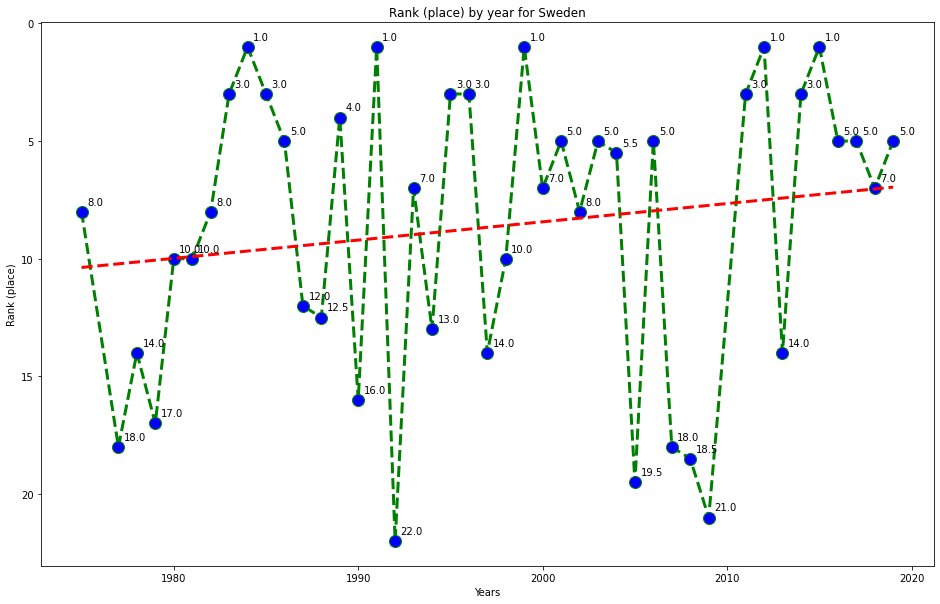

In [49]:
x = [int(year[:4]) for year in country_rank_and_points_in_finals['Edition']]
y = country_rank_and_points_in_finals['Rank']
z = np.poly1d(np.polyfit(x, y, 1))(x)

plt.figure(figsize=(16,10))
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.plot(x, z,"r--", linewidth = 3)
for year, average_points in zip(x, y): 
    plt.text(year+0.3, average_points-0.3, str(round(average_points, 2)))
plt.xlabel('Years')
plt.ylabel('Rank (place)')
plt.gca().invert_yaxis()
plt.title('Rank (place) by year for ' + country)
plt.show()

In [50]:
print('Best place for', country, 'is', df_final_rank_for_country.loc[country]['Top place'], 'in', df_final_rank_for_country.loc[country]['Top place years'])
print('Worst place for', country, 'is', df_final_rank_for_country.loc[country]['Bottom place'], 'in', df_final_rank_for_country.loc[country]['Bottom place years'])
print('The gradient is',round(-(z[-1] - z[0]) / (max(x) - min(x)), 3))

Best place for Sweden is 1.0 in 1984, 1991, 1999, 2012, 2015
Worst place for Sweden is 22.0 in 1992
The gradient is 0.078


# Average points per country in contests with the semi-finals and grand final format (2008-2019)

We will look only at contests from recent years, from 2008 to 2019, with the format of the 2 semi-finals and the grand final, as we know it today.

In [51]:
df_with_semi_finals = df[df.Year >= df[df['(semi-) final'] == 'sf1']['Year'].unique()[0]]

In [52]:
# df_with_semi_finals = df[~df.isin(['Serbia & Montenegro', 'Yugoslavia'])]

In [53]:
df_with_semi_finals.head()

Year (semi-) final Edition Jury or Televoting From country  \
21265  2008             f   2008f                  J      Albania   
21266  2008             f   2008f                  J      Albania   
21267  2008             f   2008f                  J      Albania   
21268  2008             f   2008f                  J      Albania   
21269  2008             f   2008f                  J      Albania   

                 To country  Points  
21265               Armenia       2  
21266            Azerbaijan       0  
21267  Bosnia & Herzegovina       0  
21268               Croatia       0  
21269               Denmark       0

In [54]:
df_average_points_per_country_from_2008 = df_with_semi_finals.groupby('To country').agg({'Points': ['mean']}).sort_values(('Points', 'mean'), ascending = False)

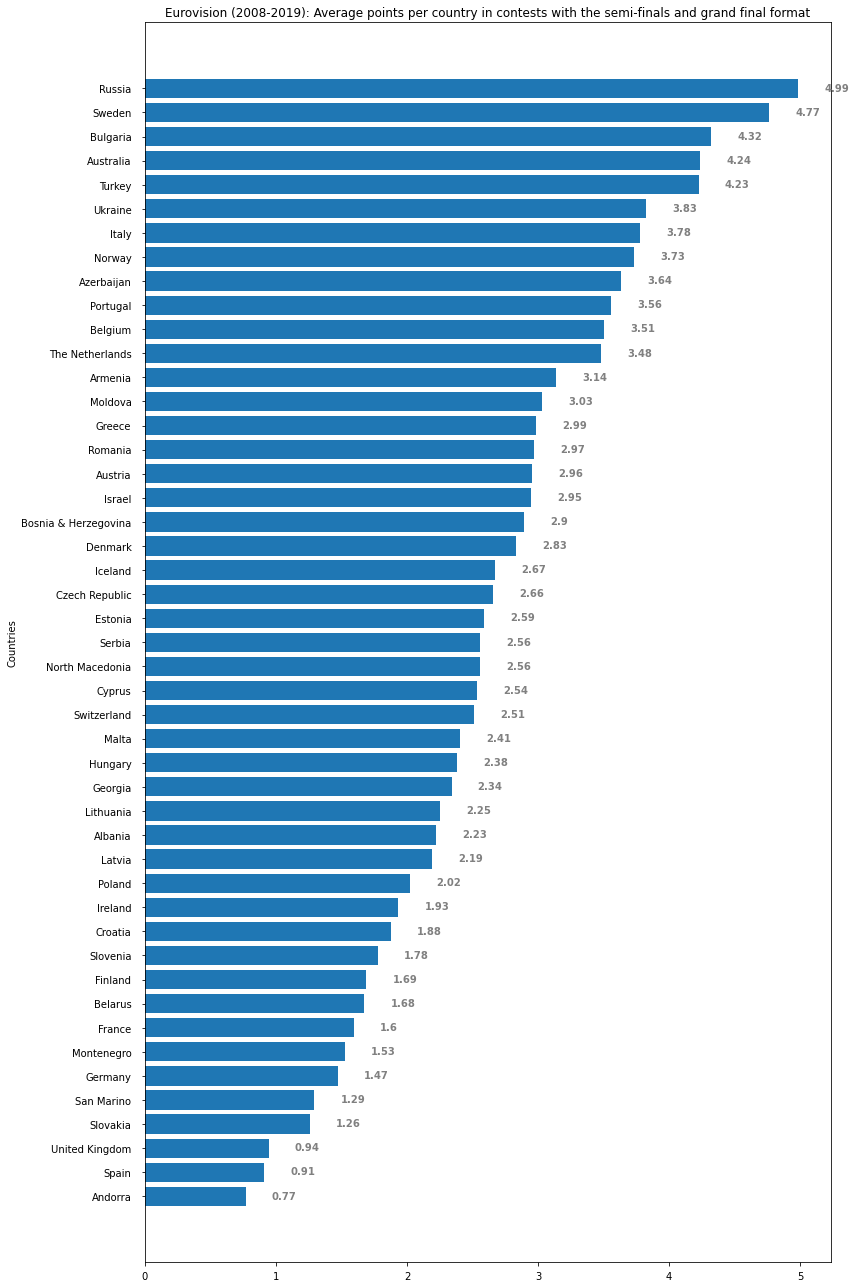

In [55]:
labels = df_average_points_per_country_from_2008[('Points', 'mean')].index
avg_points = list(df_average_points_per_country_from_2008[('Points', 'mean')])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(labels, avg_points)

ax.invert_yaxis()

ax.set_ylabel('Countries')
ax.set_title('Eurovision (2008-2019): Average points per country in contests with the semi-finals and grand final format')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

fig.tight_layout()

plt.show()

In [56]:
countries_set_semi_finals = set(df_with_semi_finals['From country'])

## Average points for country at the semi-finals

In [57]:
df_average_points_per_country_in_sf = df_with_semi_finals.loc[(df_with_semi_finals['(semi-) final'] == 'sf1') | (df_with_semi_finals['(semi-) final'] == 'sf2')].groupby('To country')['Points'].mean().sort_values(ascending=False).reset_index(name='counts')

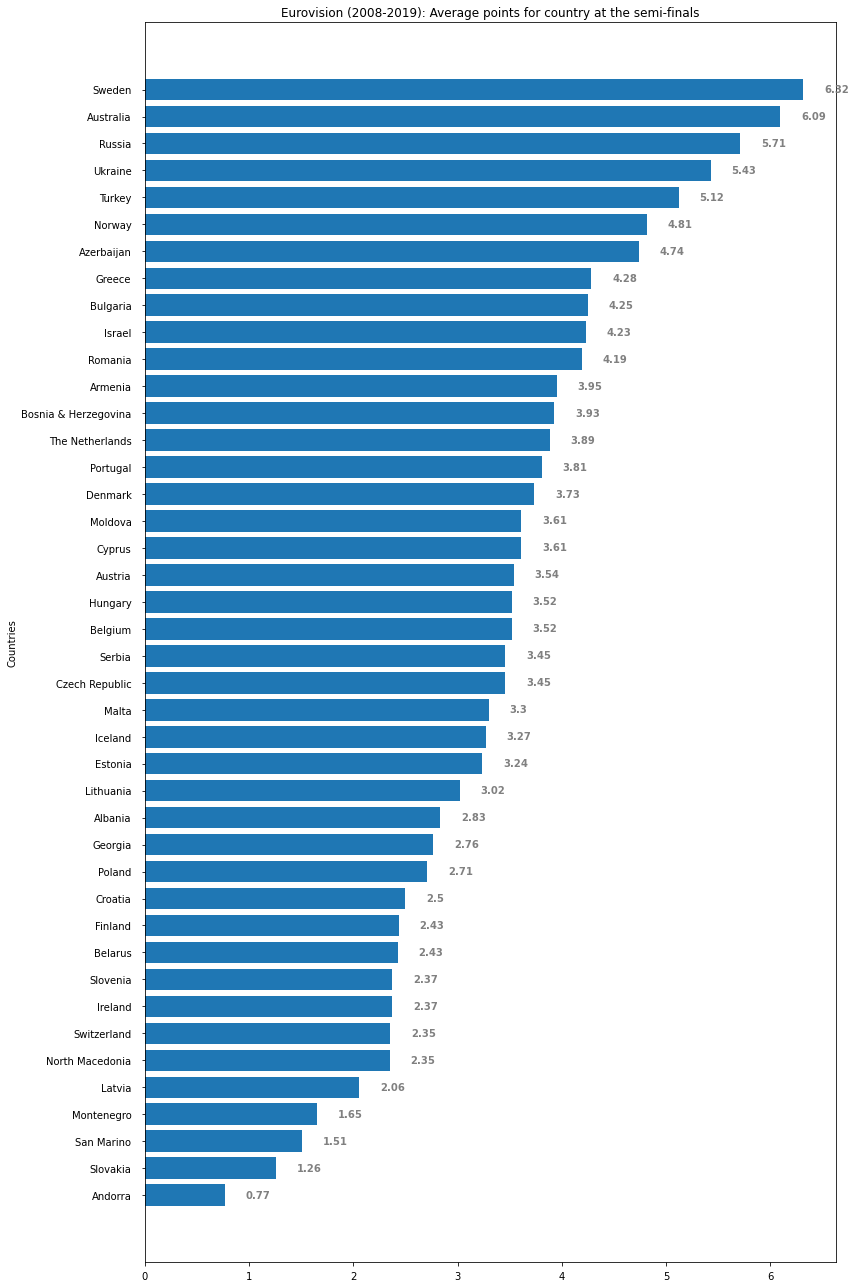

In [58]:
labels = df_average_points_per_country_in_sf['To country']
avg_points = list(df_average_points_per_country_in_sf['counts'])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(labels, avg_points)

ax.invert_yaxis()

ax.set_ylabel('Countries')
ax.set_title('Eurovision (2008-2019): Average points for country at the semi-finals')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

fig.tight_layout()

plt.show()

## Average points for country at the semi-finals by jury and televoting

In [59]:
df_with_semi_finals_jot_sf = df_with_semi_finals.loc[(df_with_semi_finals['(semi-) final'] == 'sf1') | (df_with_semi_finals['(semi-) final'] == 'sf2')].groupby(['To country', 'Jury or Televoting', ])['Points'].mean()

In [60]:
df1 = df_with_semi_finals_jot_sf.iloc[df_with_semi_finals_jot_sf.index.get_level_values('Jury or Televoting') == 'J'].to_frame(name='Jury Points').reset_index(level=1, drop=True)
df2 = df_with_semi_finals_jot_sf.iloc[df_with_semi_finals_jot_sf.index.get_level_values('Jury or Televoting') == 'T'].to_frame(name='Televoting Points').reset_index(level=1, drop=True)
df_average_jot_sf = pd.merge(df1, df2, left_index=True, right_index=True)
df_average_jot_sf['differnce between Jury and Televoting points'] = abs(df_average_jot_sf['Jury Points'] - df_average_jot_sf['Televoting Points'])
df_average_jot_sf.sort_values(by='differnce between Jury and Televoting points', ascending=False)

Jury Points  Televoting Points  \
To country                                             
Bulgaria                 3.486034           6.491803   
Portugal                 3.289773           6.153846   
Greece                   4.961702           2.287500   
Malta                    3.944681           1.400000   
Australia                7.316456           4.873418   
Cyprus                   2.995434           5.287500   
Sweden                   6.852792           4.566667   
Hungary                  2.940092           5.113924   
Poland                   2.168367           4.050633   
Georgia                  3.215962           1.544304   
Ukraine                  5.152542           6.650000   
Moldova                  3.271186           4.612500   
Estonia                  2.906780           4.212500   
Armenia                  4.299065           3.024691   
San Marino               1.158163           2.379747   
Denmark                  4.032110           2.925000   
Azerbaijan               5.018433           4.000000   
Iceland                  3.508475           2.575000   
Romania                  4.380282           3.533333   
Albania                  3.042017           2.209877   
Latvia                   2.263598           1.437500   
Montenegro               1.881443           1.075949   
Serbia                   3.663265           2.936709   
Finland                  2.609442           1.925000   
Lithuania                2.860169           3.481481   
Russia                   5.572165           6.150000   
Switzerland              2.246809           2.666667   
The Netherlands          3.791489           4.162500   
Belgium                  3.440171           3.750000   
Czech Republic           3.557143           3.275000   
Israel                   4.186047           4.393443   
Croatia                  2.452261           2.617284   
Ireland                  2.411017           2.259259   
Austria                  3.573248           3.469136   
North Macedonia          2.372881           2.271605   
Norway                   4.797235           4.862500   
Bosnia & Herzegovina     3.932773           3.900000   
Belarus                  2.418803           2.450000   
Slovenia                 2.380342           2.354430   

                      differnce between Jury and Televoting points  
To country                                                          
Bulgaria                                                  3.005770  
Portugal                                                  2.864073  
Greece                                                    2.674202  
Malta                                                     2.544681  
Australia                                                 2.443038  
Cyprus                                                    2.292066  
Sweden                                                    2.286125  
Hungary                                                   2.173832  
Poland                                                    1.882266  
Georgia                                                   1.671659  
Ukraine                                                   1.497458  
Moldova                                                   1.341314  
Estonia                                                   1.305720  
Armenia                                                   1.274374  
San Marino                                                1.221584  
Denmark                                                   1.107110  
Azerbaijan                                                1.018433  
Iceland                                                   0.933475  
Romania                                                   0.846948  
Albania                                                   0.832140  
Latvia                                                    0.826098  
Montenegro                                                0.805494  
Serbia                                                    0.726556  


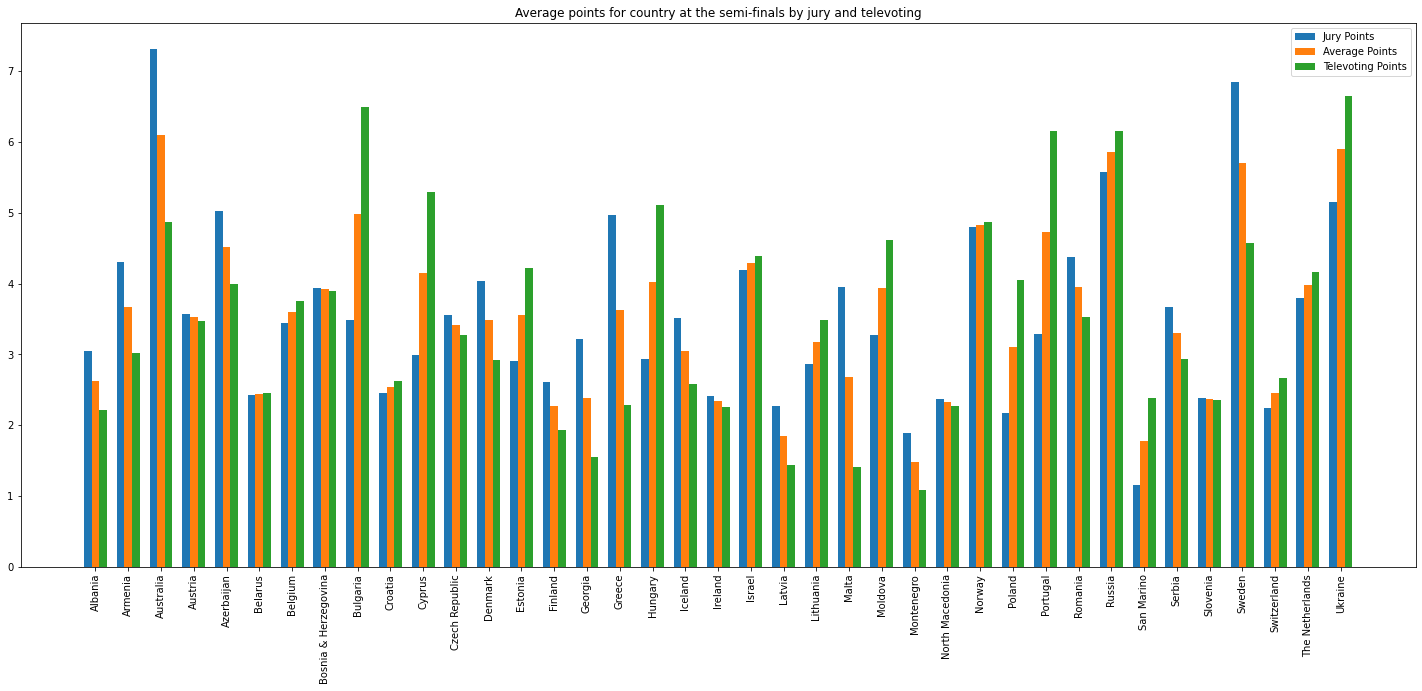

In [61]:
plt.figure(figsize=(25,10))

countries = df_average_jot_sf.index
jury_points = df_average_jot_sf['Jury Points']
avg_points = (df_average_jot_sf['Jury Points'] + df_average_jot_sf['Televoting Points']) / 2
televoting_points = df_average_jot_sf['Televoting Points']

def subcategorybar(countries, vals, width=0.8):
    n = len(vals)
    _countries = np.arange(len(countries))
    for i in range(n):
        plt.bar(_countries - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")   
    plt.xticks(_countries, countries, rotation='vertical')
    plt.legend(['Jury Points', 'Average Points', 'Televoting Points'])
    plt.title('Average points for country at the semi-finals by jury and televoting')
    
subcategorybar(countries, [jury_points, avg_points, televoting_points], 0.7)

plt.show()

## Average points for country at the final

In [62]:
df_average_points_per_country_in_final = df_with_semi_finals[df_with_semi_finals['(semi-) final'] == 'f'].groupby('To country')['Points'].mean().sort_values(ascending=False).reset_index(name='counts')

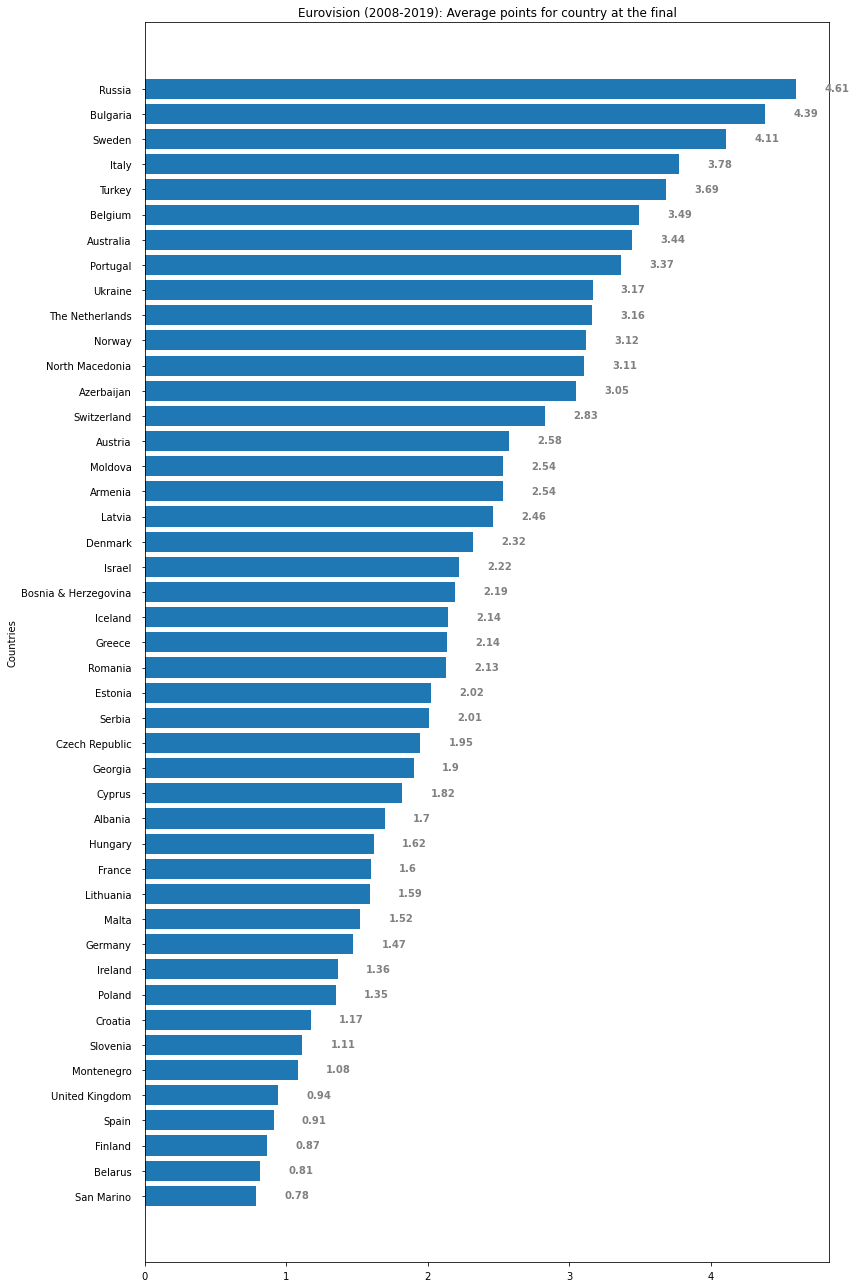

In [63]:
labels = df_average_points_per_country_in_final['To country']
avg_points = list(df_average_points_per_country_in_final['counts'])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(labels, avg_points)

ax.invert_yaxis()

ax.set_ylabel('Countries')
ax.set_title('Eurovision (2008-2019): Average points for country at the final')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

fig.tight_layout()

plt.show()

## Average points for country at the final by jury and televoting

In [64]:
df_with_semi_finals_jot_f = df_with_semi_finals[df_with_semi_finals['(semi-) final'] == 'f'].groupby(['To country', 'Jury or Televoting', ])['Points'].mean()

In [65]:
df1 = df_with_semi_finals_jot_f.iloc[df_with_semi_finals_jot_f.index.get_level_values('Jury or Televoting') == 'J'].to_frame(name='Jury Points').reset_index(level=1, drop=True)
df2 = df_with_semi_finals_jot_f.iloc[df_with_semi_finals_jot_f.index.get_level_values('Jury or Televoting') == 'T'].to_frame(name='Televoting Points').reset_index(level=1, drop=True)
df_average_jot_f = pd.merge(df1, df2, left_index=True, right_index=True)
df_average_jot_f['differnce between Jury and Televoting points'] = abs(df_average_jot_f['Jury Points'] - df_average_jot_f['Televoting Points'])
df_average_jot_f.sort_values(by='differnce between Jury and Televoting points', ascending=False)

Jury Points  Televoting Points  \
To country                                        
Romania             1.745810           5.463415   
Russia              4.037594           7.378049   
Switzerland         1.991525           5.300000   
Iceland             1.827044           4.650000   
Moldova             1.939929           4.566265   
Poland              0.582915           3.207317   
Australia           4.581281           2.030488   
North Macedonia     3.925926           1.450000   
Sweden              4.776524           2.310976   
Portugal            2.803922           4.746988   
The Netherlands     3.894958           2.103030   
Greece              2.437186           0.654321   
Azerbaijan          3.405467           1.762295   
Austria             3.107884           1.540323   
Georgia             2.125000           0.585366   
Malta               1.890295           0.444444   
San Marino          0.342105           1.625000   
Latvia              2.770492           1.536585   
Italy               3.430556           4.536585   
United Kingdom      1.166320           0.292683   
Lithuania           1.397887           2.253012   
Armenia             2.702532           1.890244   
Hungary             1.393750           2.201613   
Ukraine             2.982587           3.758065   
Germany             1.665281           0.908537   
Croatia             0.933333           1.658537   
Cyprus              1.567376           2.256098   
Bulgaria            4.072581           4.701613   
Albania             1.816254           1.280488   
Spain               1.041580           0.524390   
Serbia              2.129231           1.699187   
Denmark             2.416459           2.008130   
Finland             0.921162           0.547619   
Belarus             0.917098           0.567901   
Belgium             3.395939           3.731707   
Czech Republic      2.089431           1.804878   
France              1.523909           1.804878   
Estonia             2.081272           1.829268   
Norway              3.067839           3.284553   
Slovenia            1.160804           1.000000   
Ireland             1.338308           1.476190   
Israel              2.206790           2.243902   

                 differnce between Jury and Televoting points  
To country                                                     
Romania                                              3.717605  
Russia                                               3.340455  
Switzerland                                          3.308475  
Iceland                                              2.822956  
Moldova                                              2.626336  
Poland                                               2.624403  
Australia                                            2.550793  
North Macedonia                                      2.475926  
Sweden                                               2.465548  
Portugal                                             1.943066  
The Netherlands                                      1.791928  
Greece                                               1.782865  
Azerbaijan                                           1.643172  
Austria                                              1.567561  
Georgia                                              1.539634  
Malta                                                1.445851  
San Marino                                           1.282895  
Latvia                                               1.233906  
Italy                                                1.106030  
United Kingdom                                       0.873637  
Lithuania                                            0.855125  
Armenia                                              0.812288  
Hungary                                              0.807863  
Ukraine                                              0.775477  
Germany                                              0.756744  
Croatia                                     

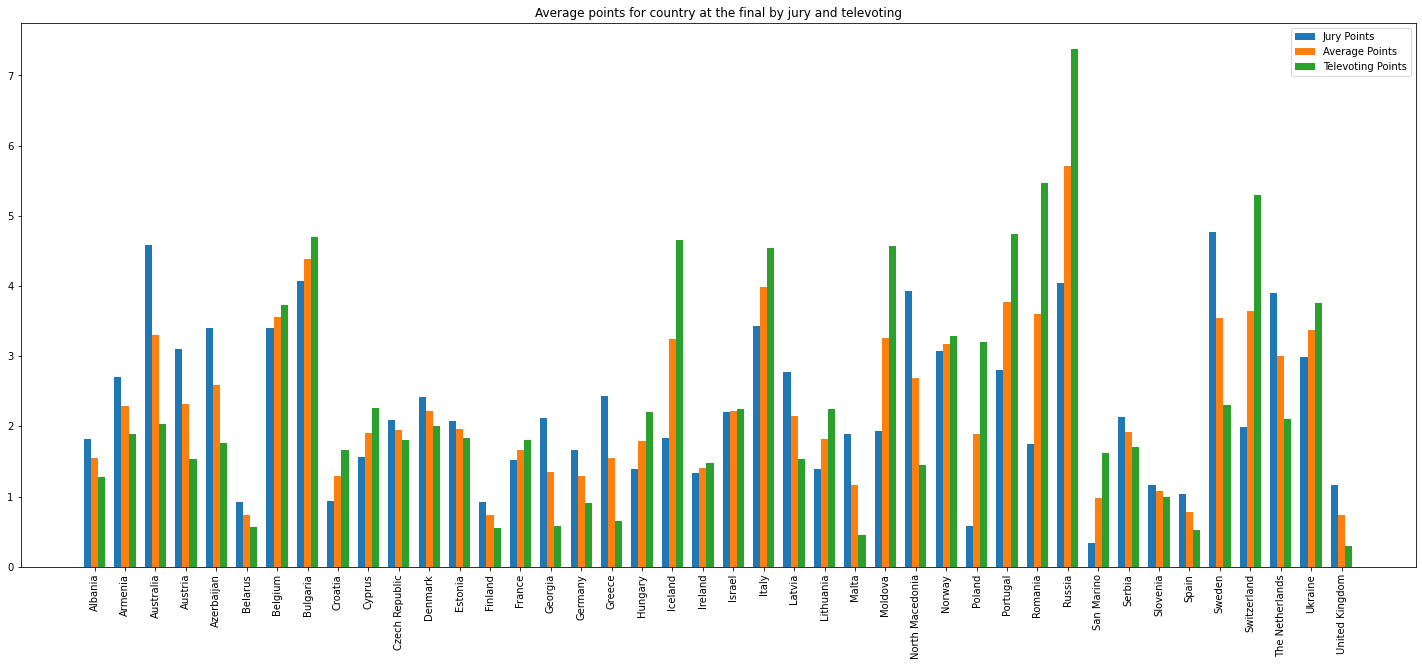

In [66]:
plt.figure(figsize=(25,10))

countries = df_average_jot_f.index
jury_points = df_average_jot_f['Jury Points']
avg_points = (df_average_jot_f['Jury Points'] + df_average_jot_f['Televoting Points']) / 2
televoting_points = df_average_jot_f['Televoting Points']

def subcategorybar(countries, vals, width=0.8):
    n = len(vals)
    _countries = np.arange(len(countries))
    for i in range(n):
        plt.bar(_countries - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")   
    plt.xticks(_countries, countries, rotation='vertical')
    plt.legend(['Jury Points', 'Average Points', 'Televoting Points'])
    plt.title('Average points for country at the final by jury and televoting')
    
subcategorybar(countries, [jury_points, avg_points, televoting_points], 0.7)

plt.show()

# Average points to country from every country

In [67]:
# Uncomment here to filter points given only by Jury or Televoting ('J' / T')
# df_with_semi_finals = df_with_semi_finals[df_with_semi_finals['Jury or Televoting'] == 'J']
# df_with_semi_finals = df_with_semi_finals[df_with_semi_finals['Jury or Televoting'] == 'T']

In [68]:
# Uncomment here to filter points given only in the finals
# df_with_semi_finals = df_with_semi_finals[df_with_semi_finals['(semi-) final'] == 'f']

In [69]:
df_average_points_to = df_with_semi_finals.groupby(['To country', 'From country']).agg({'Points': ['mean']}).sort_values(('Points', 'mean'), ascending = False)
df_average_points_to

Points
                              mean
To country From country           
Andorra    Spain         12.000000
Azerbaijan Turkey        12.000000
Spain      Andorra       12.000000
Turkey     Azerbaijan    12.000000
Romania    Moldova       11.888889
...                            ...
Bulgaria   Andorra        0.000000
           Russia         0.000000
           Slovakia       0.000000
Croatia    Andorra        0.000000
Albania    Andorra        0.000000

[2129 rows x 1 columns]

In [70]:
country = 'Israel'
df_average_points_to.iloc[df_average_points_to.index.get_level_values('To country') == country]

Points
                                     mean
To country From country                  
Israel     France                6.125000
           Andorra               5.500000
           Finland               4.894737
           Azerbaijan            4.789474
           Australia             4.416667
           The Netherlands       4.411765
           Slovakia              4.333333
           Ukraine               4.000000
           Czech Republic        3.933333
           Bulgaria              3.894737
           Armenia               3.777778
           Cyprus                3.666667
           Germany               3.454545
           Norway                3.428571
           Malta                 3.388889
           San Marino            3.250000
           United Kingdom        3.250000
           Belgium               3.200000
           Austria               3.187500
           Russia                3.166667
           Sweden                3.125000
           Italy                 3.066667
           Serbia                3.062500
           Spain                 3.058824
           Iceland               2.944444
           Georgia               2.937500
           Romania               2.894737
           Belarus               2.857143
           Poland                2.823529
           Croatia               2.812500
           Switzerland           2.625000
           Ireland               2.458333
           Moldova               2.400000
           Albania               2.388889
           Bosnia & Herzegovina  2.375000
           Hungary               2.200000
           North Macedonia       2.000000
           Lithuania             1.761905
           Montenegro            1.733333
           Portugal              1.642857
           Slovenia              1.578947
           Greece                1.555556
           Denmark               1.263158
           Latvia                0.944444
           Turkey                0.600000
           Estonia               0.555556

In [71]:
df_average_points_to = df_average_points_to.reset_index()
df_average_points_to.columns = df_average_points_to.columns.droplevel(1)
# df_average_points_to = df_average_points_to[df_average_points_to['From country'] != df_average_points_to['To country']]

## Average points from country to every country

In [72]:
df_average_points_from = df_with_semi_finals.groupby(['From country', 'To country', ]).agg({'Points': ['mean']}).sort_values(('Points', 'mean'), ascending = False)
df_average_points_from

Points
                                      mean
From country         To country           
Spain                Andorra     12.000000
Andorra              Spain       12.000000
Azerbaijan           Turkey      12.000000
Turkey               Azerbaijan  12.000000
Moldova              Romania     11.888889
...                                    ...
Turkey               Belarus      0.000000
Bosnia & Herzegovina Moldova      0.000000
Croatia              Spain        0.000000
Poland               Montenegro   0.000000
Turkey               Belgium      0.000000

[2129 rows x 1 columns]

In [73]:
country = 'Israel'
df_average_points_from.iloc[df_average_points_from.index.get_level_values('From country') == country]

Points
                                       mean
From country To country                    
Israel       Russia                7.714286
             Australia             6.461538
             Romania               6.315789
             Ukraine               5.529412
             Sweden                5.526316
             Armenia               5.437500
             Azerbaijan            4.600000
             Austria               4.375000
             Bulgaria              4.125000
             Estonia               4.058824
             Czech Republic        4.000000
             Italy                 3.769231
             France                3.125000
             Norway                2.952381
             Moldova               2.916667
             Cyprus                2.736842
             Belgium               2.705882
             Denmark               2.700000
             Georgia               2.428571
             Portugal              2.363636
             Hungary               2.352941
             Greece                2.250000
             Slovenia              2.250000
             Belarus               2.166667
             Andorra               2.000000
             Iceland               1.941176
             Finland               1.812500
             Switzerland           1.812500
             Turkey                1.666667
             Malta                 1.642857
             North Macedonia       1.615385
             Spain                 1.562500
             Ireland               1.555556
             The Netherlands       1.533333
             Poland                1.500000
             Latvia                1.400000
             San Marino            1.000000
             Montenegro            1.000000
             Lithuania             0.888889
             Croatia               0.818182
             Germany               0.812500
             United Kingdom        0.812500
             Albania               0.600000
             Bosnia & Herzegovina  0.375000
             Serbia                0.176471
             Slovakia              0.000000

In [74]:
df_average_points_from = df_average_points_from.reset_index()
df_average_points_from.columns = df_average_points_from.columns.droplevel(1)
# df_average_points_from = df_average_points_from[df_average_points_from['From country'] != df_average_points_from['To country']]

## Average points between a country and all the other participants

In [75]:
import itertools
countries = dict()
for pair in itertools.combinations(set(df_average_points_to['To country']), 2):
    countries[pair] = df_average_points_to.loc[(df_average_points_to['To country'] == pair[0]) & (df_average_points_to['From country'] == pair[1]) | 
                                               (df_average_points_to['To country'] == pair[1]) & (df_average_points_to['From country'] == pair[0])].mean()

In [76]:
from math import isnan
countries = {k: countries[k]['Points'] for k in countries if not isnan(countries[k]['Points'])}

In [77]:
countries_relationship_strength = dict(sorted(countries.items(), key=lambda item: item[1], reverse=True))

In [78]:
def country_relationship_strength(country):
    df = pd.DataFrame(columns=['code', 'country', 'Average Points to ' + country, 'Average Points from ' + country, 'difference between countries', 'Average Points'])
    connection_with_country = country
    for country1, country2 in countries_relationship_strength.keys():
        if (country1 == country) | (country2 == country):
            if (country1 == country):
                connection_with_country = country2
            elif (country2 == country):
                connection_with_country = country1
            to_pts = df_average_points_to[(df_average_points_to['To country'] == country) & (df_average_points_to['From country'] == connection_with_country)]['Points']
            if len(to_pts) > 0:
                to_pts = to_pts.iloc[0]
            else:
                to_pts = float('nan')
            from_pts = df_average_points_from[(df_average_points_from['From country'] == country) & (df_average_points_from['To country'] == connection_with_country)]['Points']
            if len(from_pts) > 0: 
                from_pts = from_pts.iloc[0]
            else:
                from_pts = float('nan')
            df = df.append({'code': codes_dict[connection_with_country],
                            'country': connection_with_country, 
                            'Average Points to ' + country: to_pts,
                            'Average Points from ' + country: from_pts,
                            'difference between countries': to_pts - from_pts,
                            'Average Points': countries_relationship_strength[(country1, country2)]}, ignore_index=True)
    return df

In [79]:
country = 'Armenia'
df_country_relationships = country_relationship_strength(country)
df_country_relationships[['country', 'Average Points']]

country  Average Points
0                 Russia        9.544408
1                Georgia        9.389744
2                 Greece        6.395238
3                 France        5.966667
4                 Cyprus        5.860294
5                Ukraine        5.350649
6                 Turkey        4.750000
7        The Netherlands        4.638889
8                 Israel        4.607639
9             Montenegro        4.569444
10                 Malta        4.565126
11              Bulgaria        4.489510
12        Czech Republic        4.332418
13               Belarus        4.207792
14               Moldova        4.114551
15               Belgium        3.755556
16              Slovakia        3.500000
17                Sweden        3.253133
18            San Marino        2.706349
19                 Spain        2.647619
20       North Macedonia        2.539216
21              Portugal        2.505952
22               Romania        2.454167
23               Austria        2.214286
24                Poland        2.195804
25                 Italy        2.041667
26               Germany        1.933333
27                Norway        1.895221
28  Bosnia & Herzegovina        1.888889
29           Switzerland        1.861111
30               Iceland        1.347222
31             Australia        1.278409
32               Hungary        1.245833
33               Estonia        1.241176
34                Latvia        1.218750
35                Serbia        1.102273
36               Finland        1.079365
37               Croatia        1.013393
38               Albania        0.913889
39               Denmark        0.829167
40              Slovenia        0.824675
41        United Kingdom        0.815789
42             Lithuania        0.464286
43               Andorra        0.375000
44               Ireland        0.170455
45            Azerbaijan        0.057692

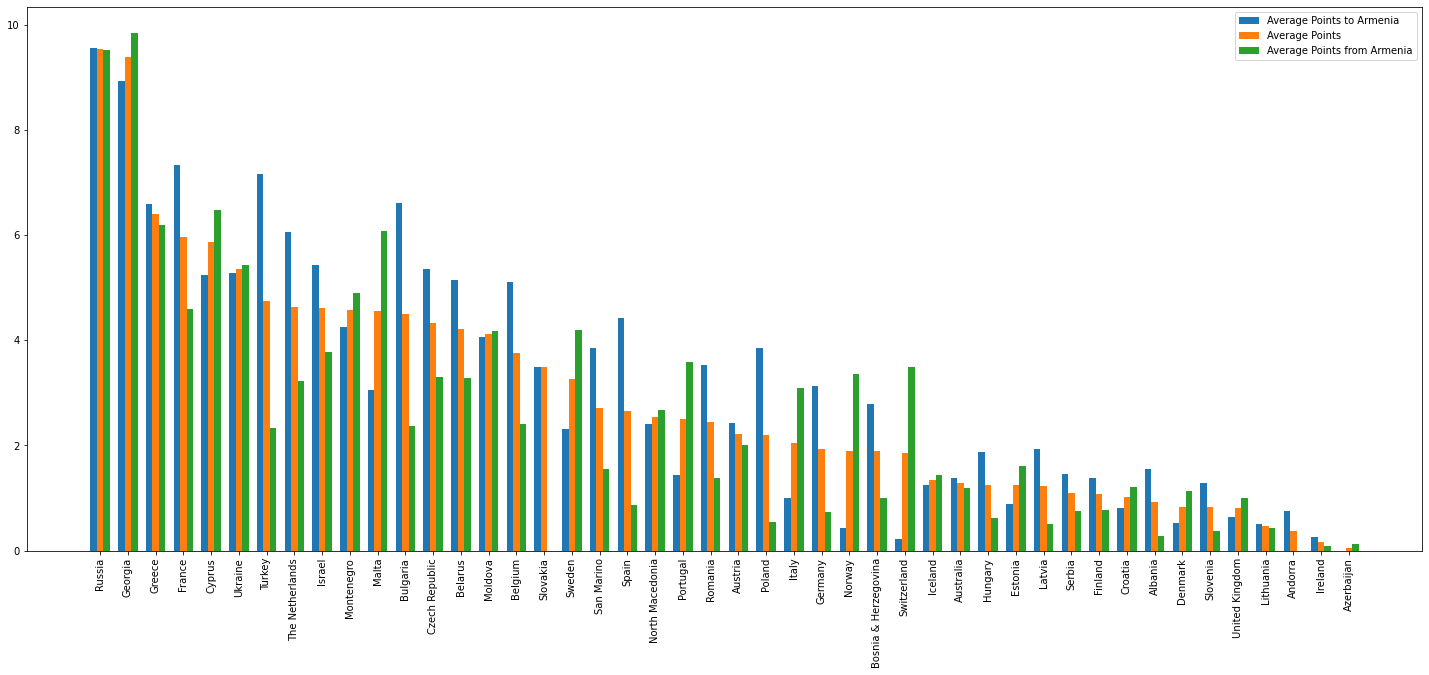

In [80]:
plt.figure(figsize=(25,10))

countries = df_country_relationships['country']
to_points = df_country_relationships['Average Points to ' + country]
avg_points = df_country_relationships['Average Points']
from_points = df_country_relationships['Average Points from ' + country]

def subcategorybar(countries, vals, width=0.8):
    n = len(vals)
    _countries = np.arange(len(countries))
    for i in range(n):
        plt.bar(_countries - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")   
    plt.xticks(_countries, countries, rotation='vertical')
    plt.legend(['Average Points to ' + country, 'Average Points', 'Average Points from ' + country])
    
subcategorybar(countries, [to_points, avg_points, from_points], 0.7)

plt.show()

# Hierarchical Clustering

In [81]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.vq import whiten

In [82]:
dist = df_average_points_to.pivot(index='From country', columns='To country', values='Points')
dist.fillna(12, inplace=True)

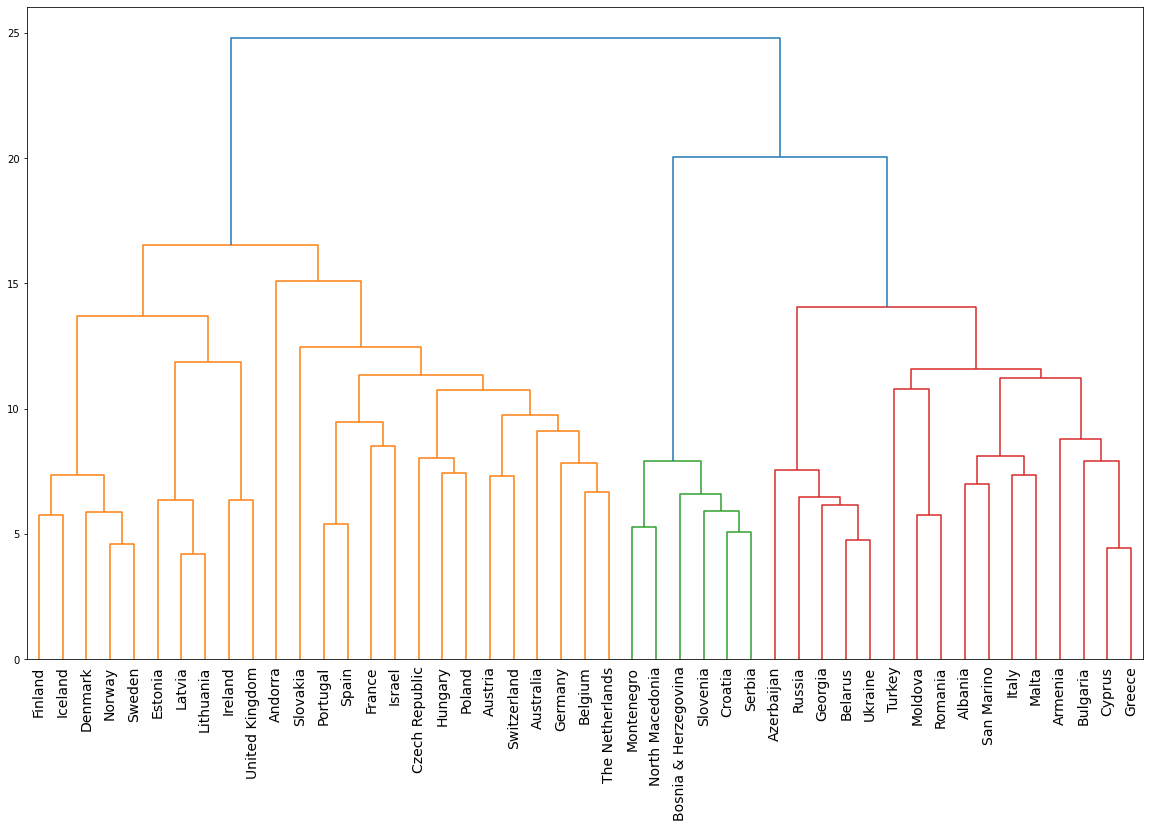

In [83]:
df_scaled = whiten(dist.to_numpy())
mergings = linkage(df_scaled, method='ward')
plt.figure(figsize=(20,12))
dn = dendrogram(mergings, labels=np.array(dist.index), color_threshold=0.7*max(mergings[:,2]), leaf_rotation=90, leaf_font_size=14)
# plt.savefig('images/hierarchical_clustering.png')
plt.show()

# Mapping the average points (to and from), given during contests with semi-finals, from jury and televoting, for a country

In [84]:
import plotly.graph_objects as go
import plotly.express as px

In [85]:
def plot_map(country):
    df = country_relationship_strength(country)

    fig = go.Figure(data=[go.Choropleth(
        locations=[codes_dict[country]],
        z = [0],
        text = [country],
        colorscale='Reds',
        reversescale=True,
        ), go.Choropleth(
        locations = df['code'],
        z = df['Average Points'],
        text = df['country'],
        colorscale = 'Blues',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title = 'Average points',
    )])

    fig.update_layout(
        title_text='All average votes/scores (to and from) given during the (semi) finals from jury and televoting for <b>' + country,
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='source: <a href="https://www.kaggle.com/datagraver/eurovision-song-contest-scores-19752019">\
                Eurovision Song Contest scores 2008-2019</a>',
            showarrow = False
        )]
    )
    
    return fig

In [86]:
plot_map('Moldova').show()

In [87]:
def save_dataframes_and_maps(countries_set, path):
    for country in countries_set:
        
        # Saving dataframe
        df_strength = country_relationship_strength(country)
        df_strength = df_strength[['country', 'Average Points to ' + country, 'Average Points from ' + country, 'Average Points']]
        if len(df_strength != 0):
            save_dataframe(df_strength, path + "df/df_" + country + ".png")
        
        # Saving maps in png format and html
        fig = plot_map(country)
        save_map_png(fig, path + "maps/map_" + country + ".png")
        save_fig_html(fig, path + "html/html_" + country + ".html")

In [88]:
# save_dataframes_and_maps(countries_set_semi_finals, "images/")

# Network

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [89]:
import networkx as nx
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (20,10)

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:80% !important; }</style>"))

## fixing bad naming in df_average_points

In [90]:
df_average_points = df_average_points_from.replace('Bosnia & Herzegovina', 'Bosnia and Herzegovina')
df_average_points = df_average_points.replace('North Macedonia', 'Macedonia')
df_average_points = df_average_points.replace('The Netherlands', 'Netherlands')

## The graph G is made of the average points between a source country and a target country

In [91]:
G = nx.from_pandas_edgelist(df_average_points, 
                            source='From country', 
                            target='To country', 
                            edge_attr='Points', 
                            create_using=nx.DiGraph())

In [92]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 47
Number of edges: 2129
Average in degree:  45.2979
Average out degree:  45.2979


## Plotting the graph

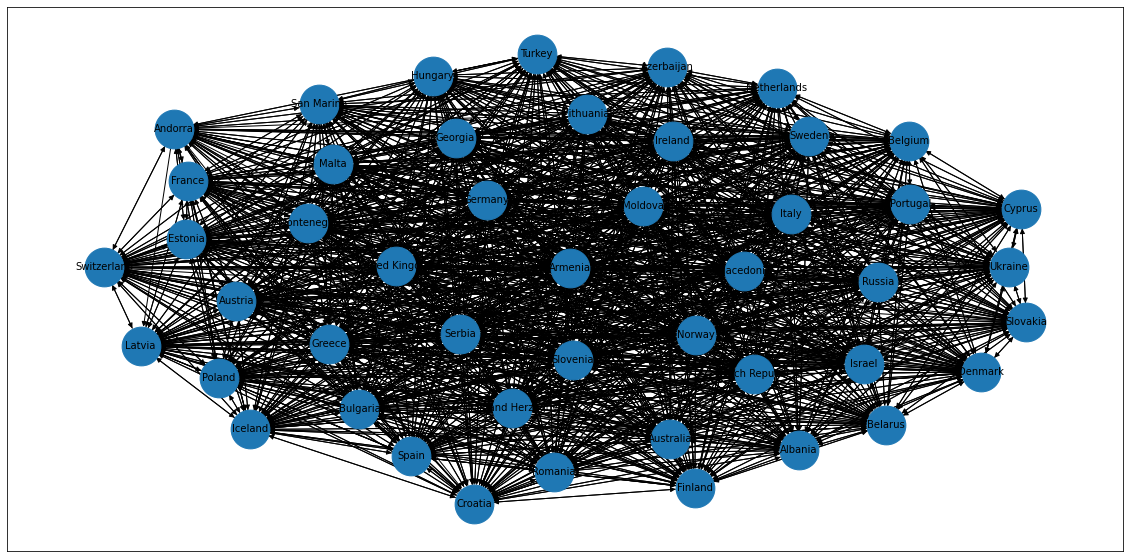

In [93]:
nx.draw_networkx(G, node_size=1500, font_size=10)

## OutDegreeView

The node out_degree is the number of edges pointing out of the node. The weighted node degree is the sum of the edge weights for edges incident to that node.

In [94]:
deg_cen_points = dict(G.out_degree(weight='Points'))
{k: v for k, v in sorted(deg_cen_points.items(), key=lambda item: item[1], reverse=True)[:10]}

{'Albania': 132.39562072344577,
 'Bosnia and Herzegovina': 131.3538961038961,
 'Macedonia': 131.25756611379674,
 'Azerbaijan': 130.64981693255515,
 'Serbia': 130.24461225049458,
 'Slovenia': 127.81841128801352,
 'Portugal': 127.77485893019951,
 'Spain': 127.7299917213849,
 'Austria': 125.61073319095765,
 'Malta': 125.14643529265786}

## InDegreeView

The node in_degree is the number of edges pointing to the node. The weighted node degree is the sum of the edge weights for edges incident to that node.

In [95]:
deg_cen_points = dict(G.in_degree(weight='Points'))
{k: v for k, v in sorted(deg_cen_points.items(), key=lambda item: item[1], reverse=True)[:10]}

{'Russia': 222.4463557297536,
 'Sweden': 216.9153748171483,
 'Bulgaria': 186.53316201772083,
 'Australia': 181.37312605694956,
 'Azerbaijan': 179.58878306054038,
 'Turkey': 176.09007936507936,
 'Ukraine': 175.84282946174696,
 'Norway': 170.8627415658779,
 'Italy': 161.71721056721057,
 'Portugal': 161.6837670499435}

## PageRank

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.

In [96]:
page_rank = dict(nx.pagerank_numpy(G,weight='Points'))
{k: v for k, v in sorted(page_rank.items(), key=lambda item: item[1], reverse=True)[:10]}

{'Russia': 0.03718005625146587,
 'Sweden': 0.035138208946148455,
 'Azerbaijan': 0.03195197385048469,
 'Bulgaria': 0.03093659233200514,
 'Ukraine': 0.030541051437991955,
 'Australia': 0.030395252411696966,
 'Turkey': 0.029715801809881197,
 'Norway': 0.028561964657689114,
 'Belgium': 0.02741146929139687,
 'Armenia': 0.027086325175282307}

## Betweenness centrality

Compute the shortest-path betweenness centrality for nodes.

In [97]:
between = dict(nx.betweenness_centrality(G,weight='Points'))
{k: v for k, v in sorted(between.items(), key=lambda item: item[1], reverse=True)[:10]}

{'Andorra': 54.12194255937597,
 'Slovakia': 24.289713899534597,
 'Turkey': 16.57230353021326,
 'Latvia': 7.398333399316754,
 'Bosnia and Herzegovina': 7.003845743956323,
 'San Marino': 5.307746855012128,
 'Poland': 3.555066017682147,
 'Montenegro': 3.4506900654628163,
 'Spain': 2.952751471439452,
 'Macedonia': 0.9577239097696307}

## Flags and flags' colors for graph visualization

In [98]:
import random

flags = {}
flag_color = {}
colors = plt.cm.jet(np.linspace(0,1,len(G.nodes()))).tolist()
for node in G.nodes():
    flags[node] = 'flags/' + (df_codes.loc[node]['cc3']).lower().replace(' ','') + '.png'
    flag_color[node] = random.choice(colors)
    colors.remove(flag_color[node])

## Position nodes using Geo-locations.

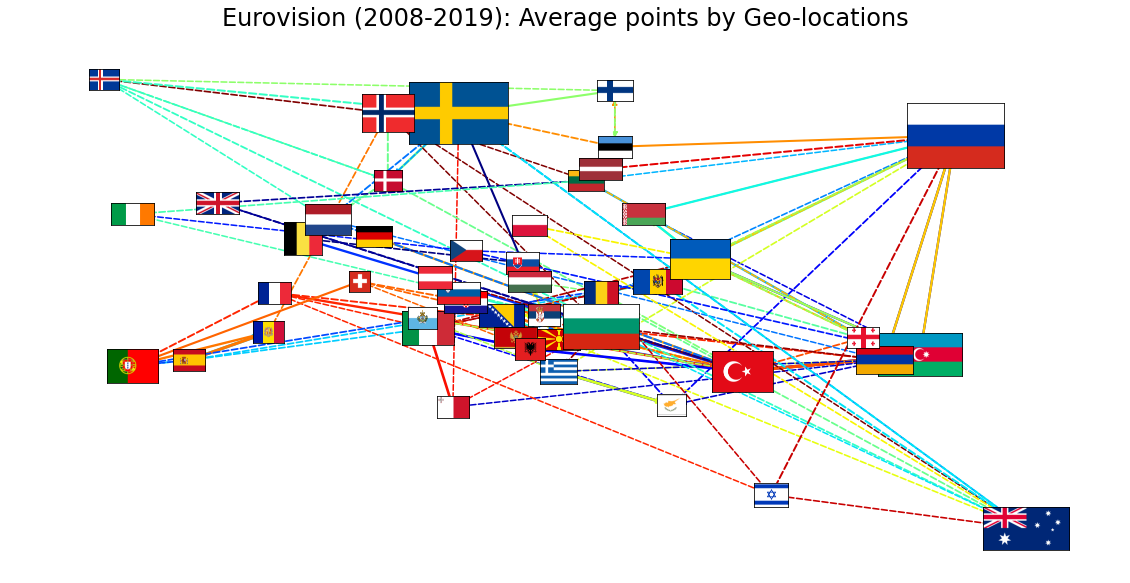

In [99]:
ax=plt.gca()
fig=plt.gcf()
plt.axis('off')
plt.title('Eurovision (2008-2019): Average points by Geo-locations',fontsize = 24)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off',
              'labelleft':'off', 'labelbottom':'off'} #flag grid params

styles = ['dotted','dashdot','dashed','solid'] # line styles

pos = {node: (max(-10, min(df_codes.loc[node]['longitude'], 55)), 
                  max(df_codes.loc[node]['latitude'], 25)) 
           for node in G.nodes()}
    
# draw edges
for e in G.edges(data=True):
    width = e[2]['Points']/4 #normalize by max points
    style=styles[int(np.ceil(width))]
    if width>1.5: #filter small votes
        nx.draw_networkx_edges(G,pos,edgelist=[e],width=width, style=style,edge_color = flag_color[e[0]])
        # in networkx versions >2.1 arrowheads can be adjusted

#draw nodes    
for node in G.nodes():      
    imsize = max((0.3*G.in_degree(node,weight='Points')/max(dict(G.in_degree(weight='Points')).values()))**2,0.03)
    
    # size is proportional to the votes
    flag = mpl.image.imread(flags[node])
    
    (x,y) = pos[node]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    
    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    country.imshow(flag)
    country.axes.get_xaxis().set_visible(False)
    country.axes.get_yaxis().set_visible(False)
    country.set_aspect('equal')
    country.tick_params(**tick_params)
    
# fig.savefig('images/eurovision_network_geo.png')

## Position nodes using Fruchterman-Reingold force-directed algorithm.

Force-directed graph drawing algorithms are a class of algorithms for drawing graphs in an aesthetically-pleasing way. Their purpose is to position the nodes of a graph in two-dimensional or three-dimensional space so that all the edges are of more or less equal length and there are as few crossing edges as possible, by assigning forces among the set of edges and the set of nodes, based on their relative positions, and then using these forces either to simulate the motion of the edges and nodes or to minimize their energy.

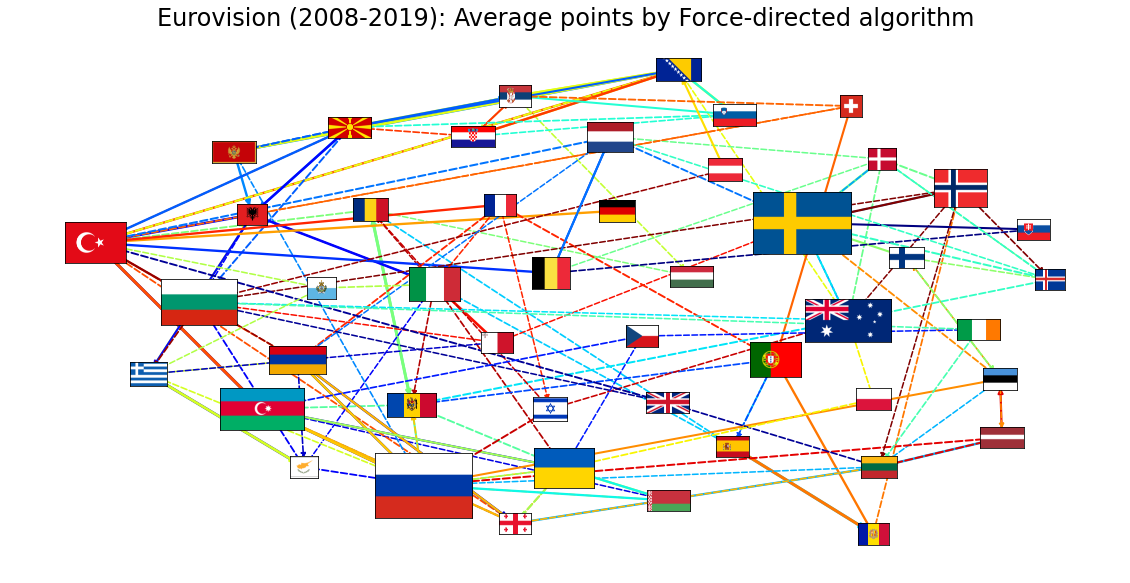

In [100]:
ax=plt.gca()
fig=plt.gcf()
plt.axis('off')
plt.title('Eurovision (2008-2019): Average points by Force-directed algorithm',fontsize = 24)

pos = nx.layout.fruchterman_reingold_layout(G,k=1,weight = 'Points',iterations=1000,scale = 2)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off',
              'labelleft':'off', 'labelbottom':'off'} #flag grid params
styles = ['dotted','dashdot','dashed','solid'] # line styles

# draw edges
for e in G.edges(data=True):
    width = e[2]['Points']/4 #normalize by max points
    style=styles[int(np.ceil(width))]
    if width>1.5: #filter small votes
        nx.draw_networkx_edges(G,pos,edgelist=[e],width=width, style=style, edge_color = flag_color[e[0]])
        # in networkx versions >2.1 arrowheads can be adjusted

#draw nodes    
for node in G.nodes():    
    imsize = max((0.3*G.in_degree(node,weight='Points')/max(dict(G.in_degree(weight='Points')).values()))**2,0.03)
    # size is proportional to the votes
    flag = mpl.image.imread(flags[node])
    
    (x,y) = pos[node]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    
    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    country.imshow(flag)
    country.axes.get_xaxis().set_visible(False)
    country.axes.get_yaxis().set_visible(False)
    country.set_aspect('equal')
    country.tick_params(**tick_params)
    
# fig.savefig('images/eurovision_network_fda.png')